## Filtro por bandas de octava normalizadas

<p style="text-align: justify;">Los filtros analógicos están definidos por su respuesta en frecuencia, la cual es compleja y se compone de una magnitud y de una fase. Es decir que al pasar una señal senoidal por un filtro, la salida será también una senoidal de la misma frecuencia pero con amplitud y fase distinta.
La respuesta en frecuencia de un filtro de orden n puede expresarse como:</p>

$$ H(j\omega) = \frac{b_0 + b_1 \cdot e^{-j\omega t} + ... +  b_n \cdot (e^{-j\omega t})^{n}}{a_0 + a_1 \cdot e^{-j\omega t} + ... +  a_n \cdot (e^{-j\omega t})^{n}} $$

<p style="text-align: justify;">El orden del filtro determinará las condiciones que debe cumplir, relacionadas con la ganancia en cada banda, el máximo de ripple permitido, y otras especificaciones.
Los coeficientes $b_i$ y $a_i$ definen la naturaleza del filtro, y su cálculo será uno de los objetivos de esta sección.</p>
<p style="text-align: justify;">Para empezar se diseña un filtro Butterworth pasabanda de orden n=3 para cada una de las primeras ocho bandas de octavas. Este tipo de filtros se caracterizan por tener una respuesta en frecuencia plana en la banda de paso. Para ello se imprimen los valores tabulados de las frecuencias centrales y las frecuencias de corte inferiores y superiores.</p>

In [2]:
import numpy as np
import scipy.io.wavfile as wav 
from fftplot import graficar_fft
import sounddevice as sd
from scipy import signal
import matplotlib.pyplot as plt

In [3]:
fs, audiodata = wav.read('demo1.wav')

<ipython-input-3-53686111a58c>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audiodata = wav.read('demo1.wav')


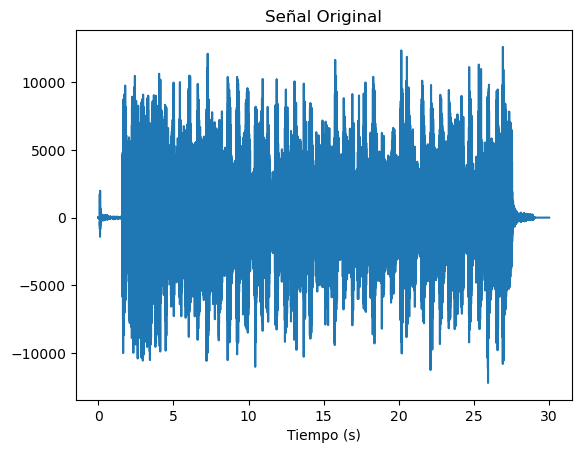

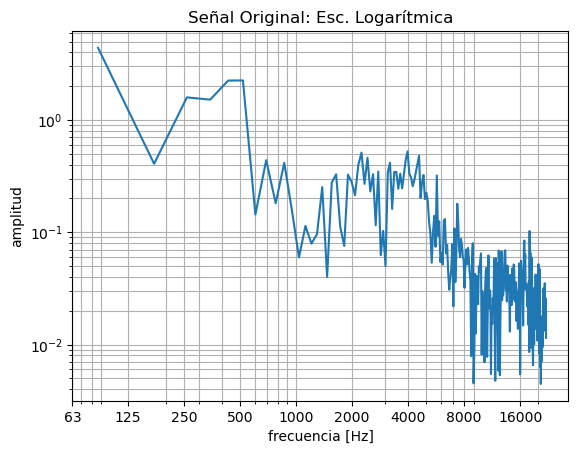

In [4]:
t= np.linspace(0,(audiodata.size)//fs, audiodata.size)

plt.figure(); plt.plot(t, audiodata); plt.title('Señal Original'); plt.xlabel('Tiempo (s)')
graficar_fft(audiodata, fs, 512, log=True,title='Señal Original: Esc. Logarítmica')

plt.show()

In [1]:
print("NUM FILTRO | F.INF |  F.C  | F.SUP  |")
print("    1      |   44  |   64  |    88  |")
print("    2      |   88  |  125  |   177  |")
print("    3      |  177  |  260  |   355  |")
print("    4      |  355  |  500  |   710  |")      
print("    5      |  710  | 1000  |  1420  |")
print("    6      | 1420  | 2000  |  2840  |")
print("    7      | 2840  | 4000  |  5680  |")      
print("    8      | 5680  | 8000  | 11360  |")

NUM FILTRO | F.INF |  F.C  | F.SUP  |
    1      |   44  |   64  |    88  |
    2      |   88  |  125  |   177  |
    3      |  177  |  260  |   355  |
    4      |  355  |  500  |   710  |
    5      |  710  | 1000  |  1420  |
    6      | 1420  | 2000  |  2840  |
    7      | 2840  | 4000  |  5680  |
    8      | 5680  | 8000  | 11360  |


In [5]:
fc=[64,125,250,500,1000,2000,4000,8000]

coeficientes= np.zeros((8,2,7))
f_sup=np.arange(0,8)
f_inf=np.arange(0,8)

In [6]:
coeficientes

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

Para la banda de octava con frecuencia central  64  Hz.
Los coeficientes del filtro Butterworth BP son: a=  [  1.          -5.98690154  14.93484119 -19.87034689  14.87100899
  -5.93583435   0.98723261]
Y b=  [ 3.29382619e-08  0.00000000e+00 -9.88147858e-08  0.00000000e+00
  9.88147858e-08  0.00000000e+00 -3.29382619e-08]

Para la banda de octava con frecuencia central  125  Hz.
Los coeficientes del filtro Butterworth BP son: a=  [  1.          -5.9739558   14.87105657 -19.74464986  14.7471685
  -5.87483474   0.97521532]
Y b=  [ 2.43918040e-07  0.00000000e+00 -7.31754121e-07  0.00000000e+00
  7.31754121e-07  0.00000000e+00 -2.43918040e-07]

Para la banda de octava con frecuencia central  250  Hz.
Los coeficientes del filtro Butterworth BP son: a=  [  1.          -5.94603357  14.73532418 -19.48080872  14.49082323
  -5.7503491    0.95104398]
Y b=  [ 1.92723753e-06  0.00000000e+00 -5.78171258e-06  0.00000000e+00
  5.78171258e-06  0.00000000e+00 -1.92723753e-06]

Para la banda de octava con

<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-18-8833905d3cad>:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(-100,10)
<ipython-input-1

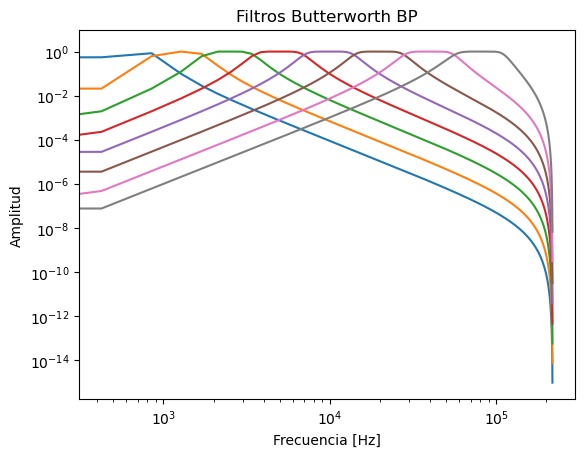

In [18]:
for i,f in enumerate(fc):
    f_sup=f*(10**(3/20))
    f_inf=f*(10**(-3/20))
    wc = ([f_inf / (0.5*fs), f_sup / (0.5*fs)])
    b,a = signal.butter(3, Wn=wc, btype='bandpass')
    w, h = signal.freqz(b,a)
    c = fs/2*np.pi
    w0 = c*w

    coeficientes[i,0,:]=a
    coeficientes[i,1,:]=b
    print('Para la banda de octava con frecuencia central ',f, ' Hz.')
    print('Los coeficientes del filtro Butterworth BP son: a= ',a)
    print('Y b= ',b)
    print()
    plt.loglog(w0,np.abs(h));plt.title('Filtros Butterworth BP');plt.xlabel('Frecuencia [Hz]'); plt.ylabel('Amplitud')
    plt.ylim(-100,10)

plt.show()

Para manipular la señal de audio conviene convertir el vector audio_signal a float32. También normalizamos la señal antes de pasarla por el filtro.

In [20]:
audiodata.max()

12587

In [21]:
audiodata = audiodata.astype(np.float32, order='C') / 32768.0 
audiodata = audiodata / np.max(np.abs(audiodata))

Para cada frecuencia se hace pasar la señal por un filtro cuyos coeficientes dependen de la misma. El ciclo for permite almacenar en el array señal_filtrada y a la vez graficar en un subplot la señal filtrada en el dominio del tiempo y en el de la frecuencia.

In [22]:
audiodata_filtrada = np.zeros((8,len(audiodata)))

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


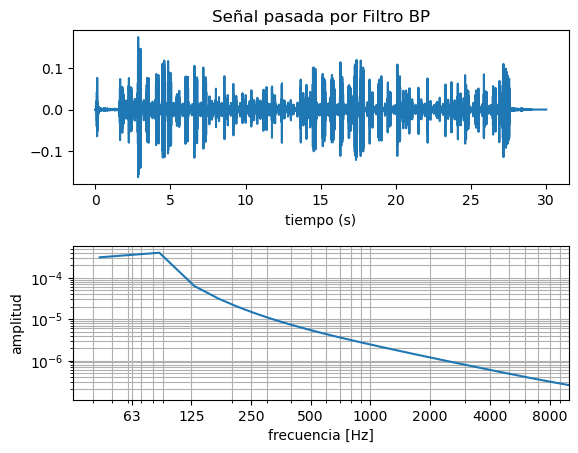

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


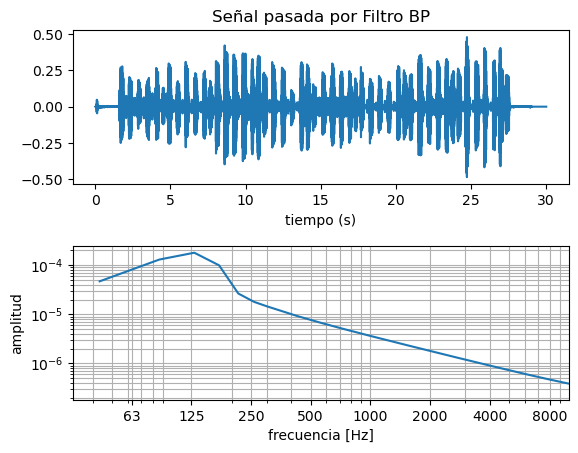

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


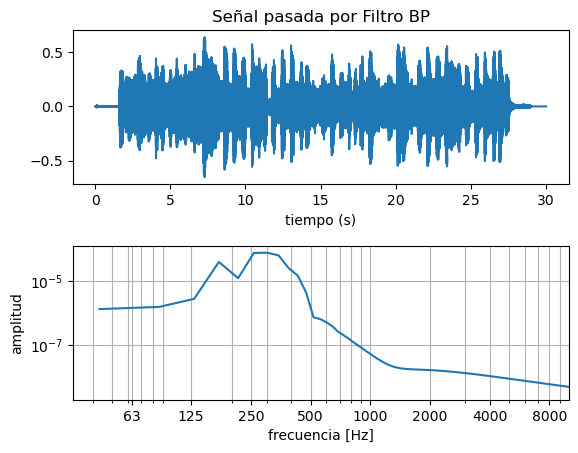

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


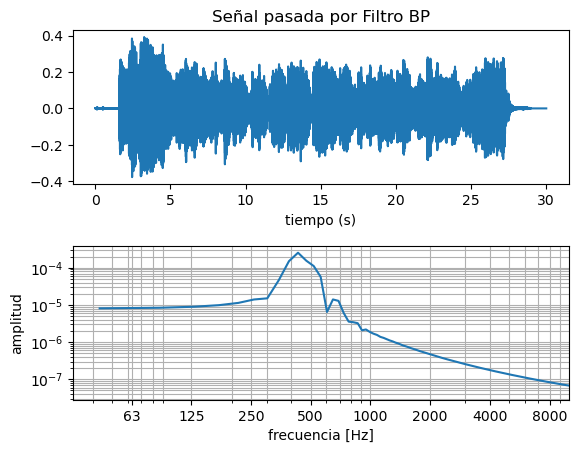

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


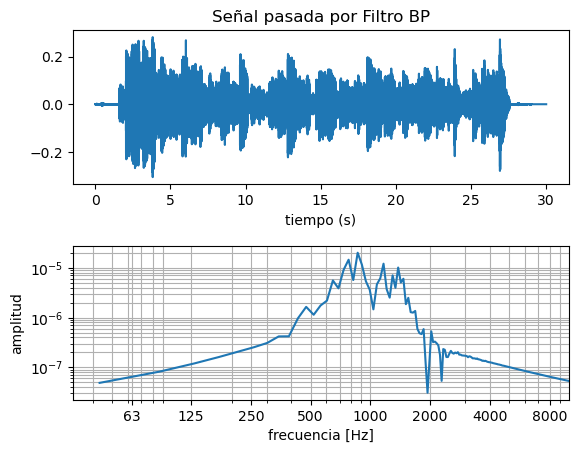

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


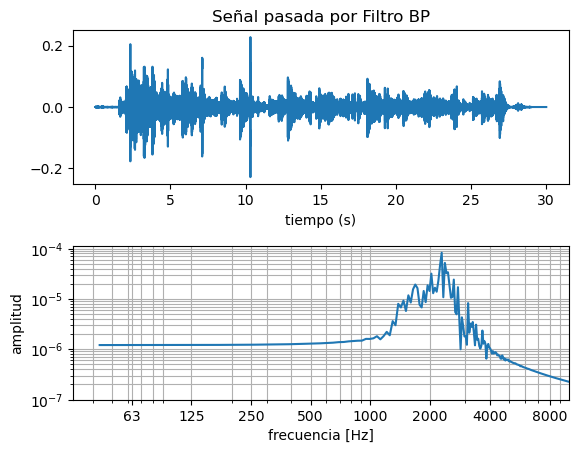

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


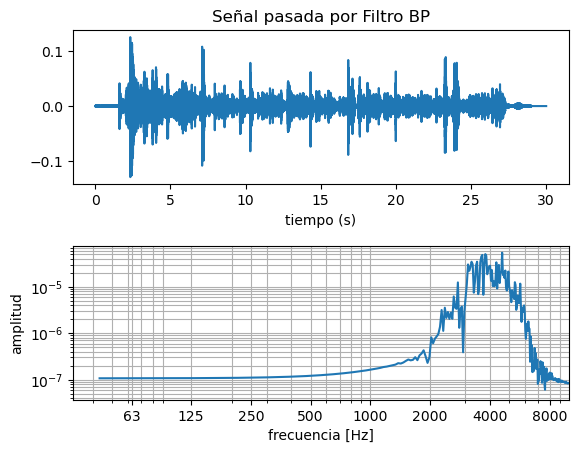

<ipython-input-25-a93bf705b0e5>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)


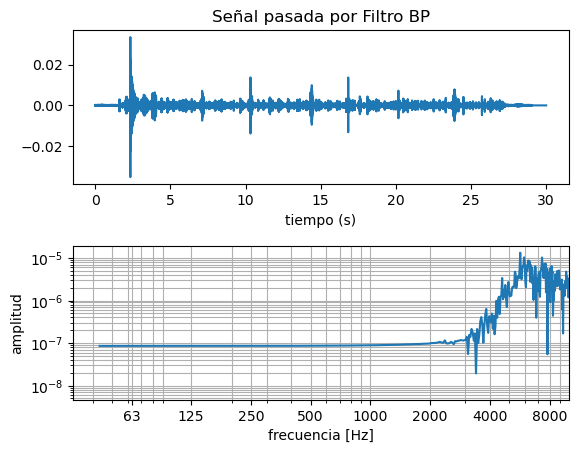

In [25]:
for i,f in enumerate(fc):
        audiodata_filtrada[i,:] = signal.filtfilt(coeficientes[i,1,:],coeficientes[i,0,:], audiodata) 
        audiodata_filtrada[i,:] = audiodata_filtrada[i,:].astype(np.float32, order='C')
        fig, (ax1,ax2) = plt.subplots(2,1)
        ax1.plot(t, audiodata_filtrada[i,:]); ax1.set_xlabel('tiempo (s)'), ax1.set_title('Señal pasada por Filtro BP')
        graficar_fft(audiodata_filtrada[i,:], fs, 1024, log=True, objeto_ax=ax2);plt.xlim(0,10000)
        plt.subplots_adjust(wspace = 0.5,hspace=0.4)
        plt.show()
        
        

In [27]:
wav.write('audiodata filtro BB 64.wav', fs, audiodata_filtrada[0,:])
wav.write('audiodata filtro BP 125.wav', fs, audiodata_filtrada[1,:])
wav.write('audiodata filtrada BP 250.wav', fs, audiodata_filtrada[2,:])
wav.write('audiodata filtrada BP 500.wav', fs, audiodata_filtrada[3,:])
wav.write('audiodata filtrada BP 1K.wav', fs, audiodata_filtrada[4,:])
wav.write('audiodata filtrada BP 2K.wav', fs, audiodata_filtrada[5,:])
wav.write('audiodata filtrada BP 4K.wav', fs, audiodata_filtrada[6,:])
wav.write('audiodata filtrada BP 8K.wav', fs, audiodata_filtrada[7,:])